# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Leia o arquivo csv como um dataframe chamado df** 

In [ ]:
df = pd.read_csv('911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**1) Quais são os top 5 CEPs nas chamadas 911?**

*Forma Errada:*

In [ ]:
# Se usarmos a função 'sort_values' teremos os valores de zip na forma crescente ou decrescente (ascending=False)
# Mas desejamos o top5 de quantidades de vezes que o 'zip' apareceu.
df.sort_values(by=['zip'], ascending=True).head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
8367,41.167156,-76.874030,MAIN; ; Station 308A; 2016-01-02 @ 13:01:30;,17752.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-01-02 13:06:00,NaN,MAIN,1
41689,40.453790,-75.459977,MILL HILL RD & ORCHARD RD; LEHIGH COUNTY; Sta...,18036.0,EMS: RESPIRATORY EMERGENCY,2016-03-26 07:22:00,LEHIGH COUNTY,MILL HILL RD & ORCHARD RD,1
26763,40.456517,-75.463066,ORCHARD RD & SCHOOL HOUSE LN; LEHIGH COUNTY; ...,18036.0,EMS: CHOKING,2016-02-15 16:07:01,LEHIGH COUNTY,ORCHARD RD & SCHOOL HOUSE LN,1
95602,40.403330,-75.510632,COLONIAL DR & HAMILTON RD; EAST GREENVILLE; 20...,18041.0,Traffic: VEHICLE ACCIDENT -,2016-08-14 09:42:02,EAST GREENVILLE,COLONIAL DR & HAMILTON RD,1
88215,40.392254,-75.515893,CHURCH RD; UPPER HANOVER; Station 369; 2016-0...,18041.0,EMS: VEHICLE ACCIDENT,2016-07-26 16:02:02,UPPER HANOVER,CHURCH RD,1


**Correct Form Below**

In [ ]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**2) Quais são os 5 principais municípios nas chamadas 911?**

In [ ]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**3) Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

In [ ]:
df['title'].nunique()
#df['title'].unique() -> Para mostrar os nomes das colunas

110

## Criando novos recursos

- **4)** Na coluna "**title**" existem "**Razões / Departamentos**" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". 

Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [ ]:
df['title'].iloc[0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [ ]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

**5) Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [ ]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**6) Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.**

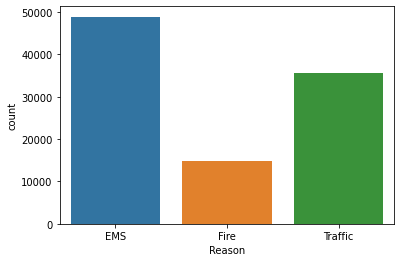

In [ ]:
sns.countplot(x='Reason', data=df)

**7) Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?**

In [ ]:
type(df.timeStamp)

pandas.core.series.Series

In [ ]:
type(df['timeStamp'].iloc[1])

str

**8) Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime.**

In [ ]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [ ]:
type(df.timeStamp.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**9) Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.**

In [ ]:
# Verificando formato da timeStamp
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [ ]:
# Pegando somente a hora
time = df['timeStamp'].iloc[0]
time.date # Ao usar '.' vemos as opções de trabalho

<function Timestamp.date>

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda h: h.hour)

In [ ]:
df['Month'] = df['timeStamp'].apply(lambda m: m.month)

In [ ]:
df['day_of_week'] = df['timeStamp'].apply(lambda d: d.dayofweek)
df['day_of_week'].head()

0    3
1    3
2    3
3    3
4    3
Name: day_of_week, dtype: int64

**10) Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(dmap)
df['day_of_week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day_of_week, Length: 99492, dtype: object

In [ ]:
#or

def day_week(days):
  for key, days in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    print(key, days)

day_week(df['day_of_week'])

0 Mon
1 Tue
2 Wed
3 Thu
4 Fri
5 Sat
6 Sun


**11) Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason.**

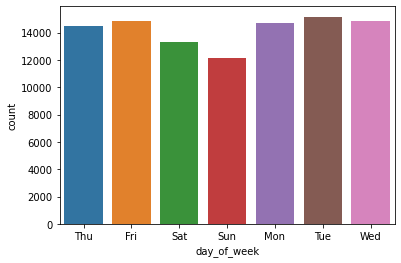

In [ ]:
sns.countplot(x='day_of_week', data=df)

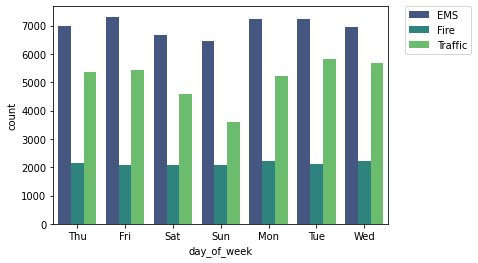

In [ ]:
sns.countplot(x='day_of_week', data=df, hue='Reason', palette='viridis')
# Corrigir a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**12) Agora faça o mesmo para o mês:**

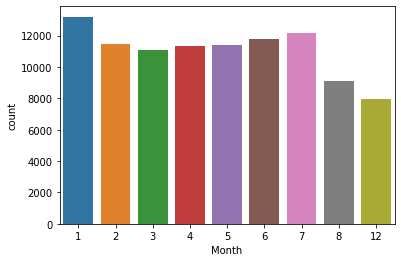

In [ ]:
sns.countplot(x='Month', data=df)

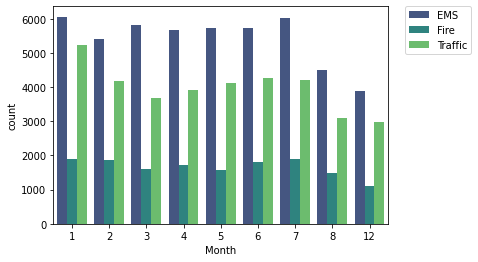

In [ ]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
# Corrigir a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Você notou algo estranho no Plot?**

_____

- Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

**13) Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado.**

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()
# Mostra-se a contagem de cada features em cada mês

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day,day_of_week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


**14) Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês.**

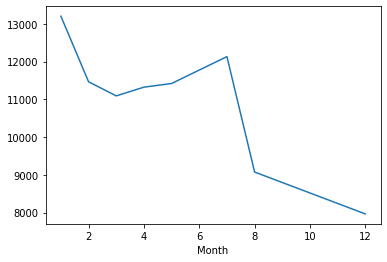

In [ ]:
byMonth['twp'].plot()

**15) Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna.**

In [ ]:
# Nosso 'byMonth' está como index, logo temos que transforma-lo em coluna para podermos plotar.
Month_Column = byMonth.reset_index()

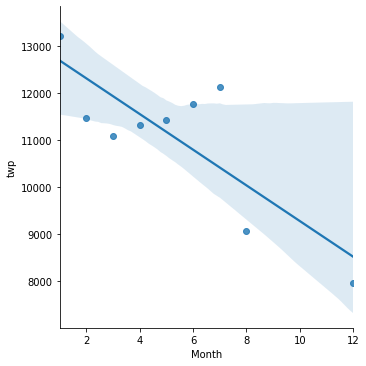

In [ ]:
sns.lmplot(x='Month', y='twp', data=Month_Column)

**16) Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date().**

In [ ]:
df['Data'] = df['timeStamp'].apply(lambda d: d.date())

**17) Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911.**

In [ ]:
byData = df.groupby('Data').count()

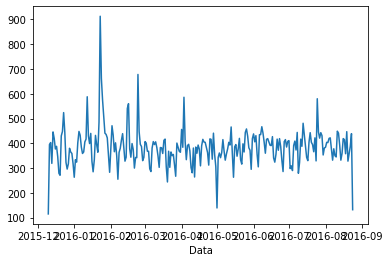

In [ ]:
byData['twp'].plot()

**18) Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911**

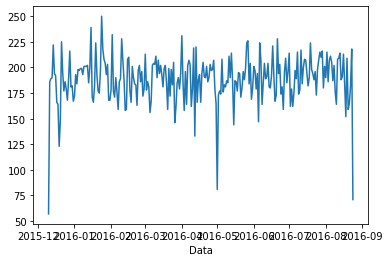

In [ ]:
df[df['Reason']=='EMS'].groupby('Data').count()['twp'].plot()

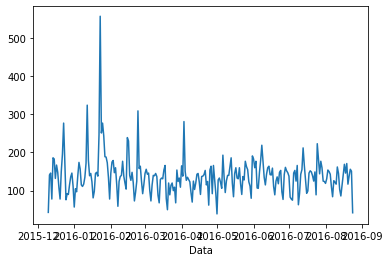

In [ ]:
df[df['Reason']=='Traffic'].groupby('Data').count()['twp'].plot()

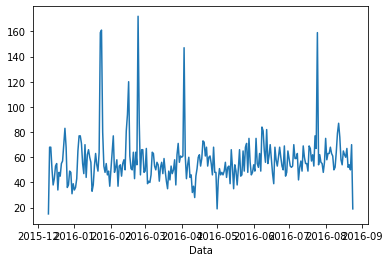

In [ ]:
df[df['Reason']=='Fire'].groupby('Data').count()['twp'].plot()

____
**19) Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).**

In [ ]:
dayHour = df.groupby(by=['day_of_week', 'Hour']).count()['twp'].unstack()

In [ ]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,793,822,893,842,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,697,769,801,830,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,643,693,770,679,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,887,936,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,840,837,887,917,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,800,789,902,872,903,867,989,1036,894,686,668,574,490,334


**20) Agora crie um mapa de calor usando este DataFrame**

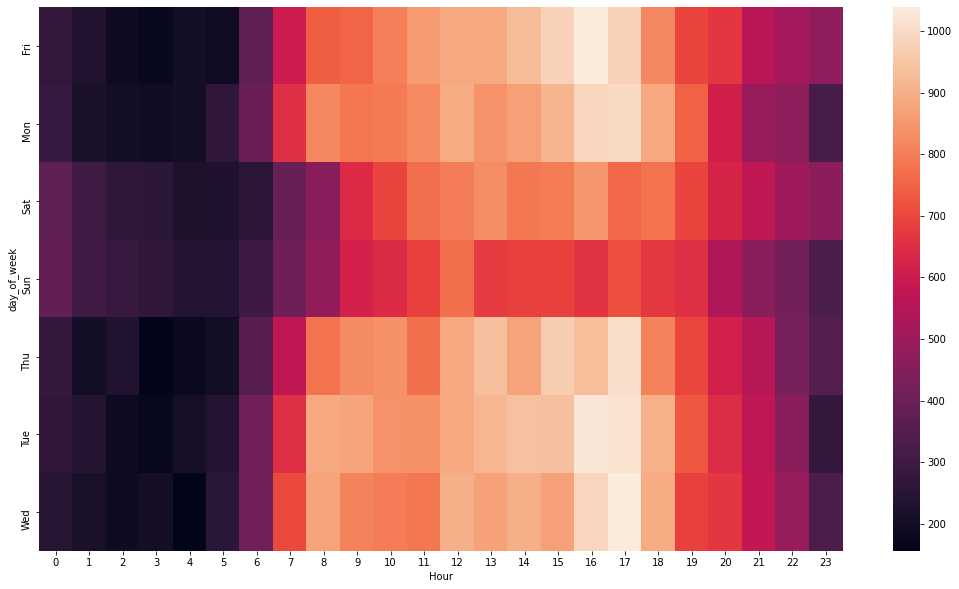

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(dayHour)

**21) Agora crie um clustermap usando este DataFrame.**

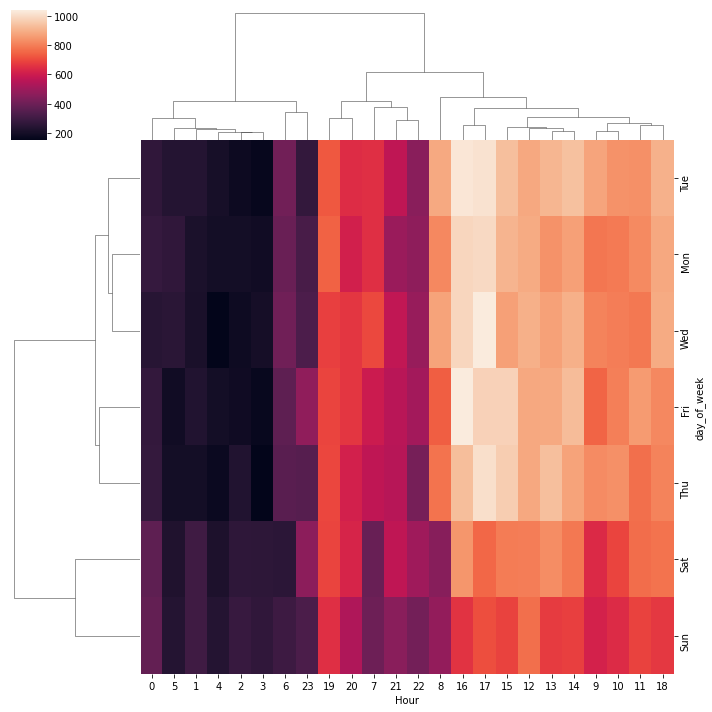

In [ ]:
sns.clustermap(dayHour)

**22) Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna.**

In [ ]:
dayMonth = df.groupby(by=['day_of_week', 'Month']).count()['twp'].unstack()

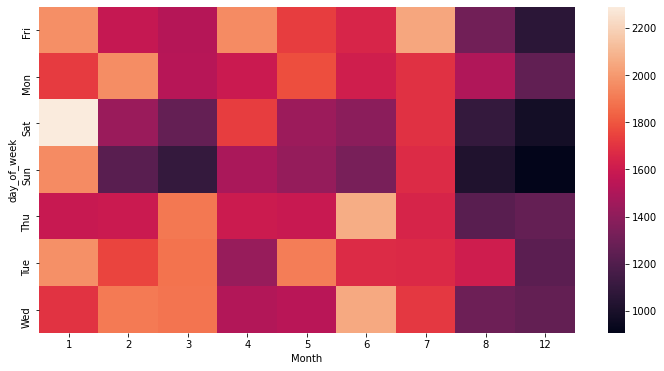

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

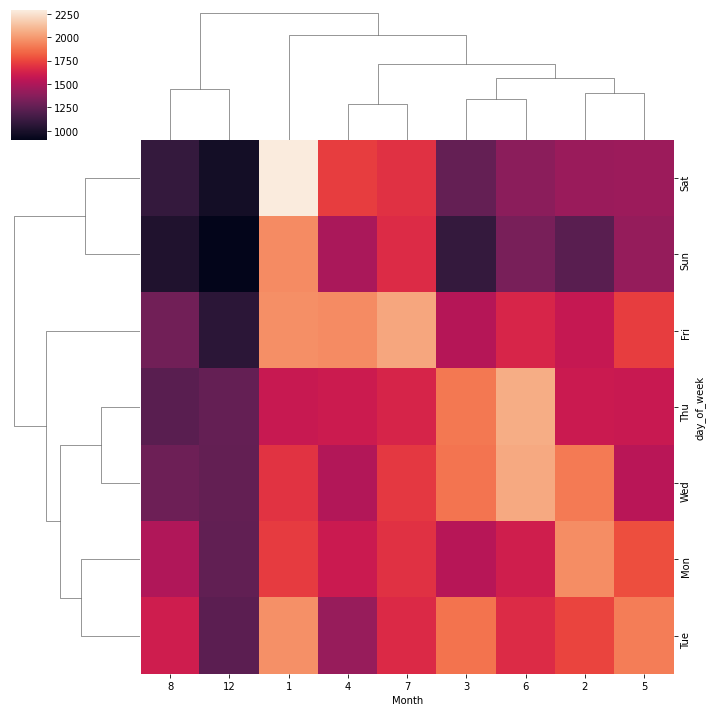

In [ ]:
sns.clustermap(dayMonth)